### TASK 2- CREDIT CARD FRAUD DETECTION DATASET CODSOFT

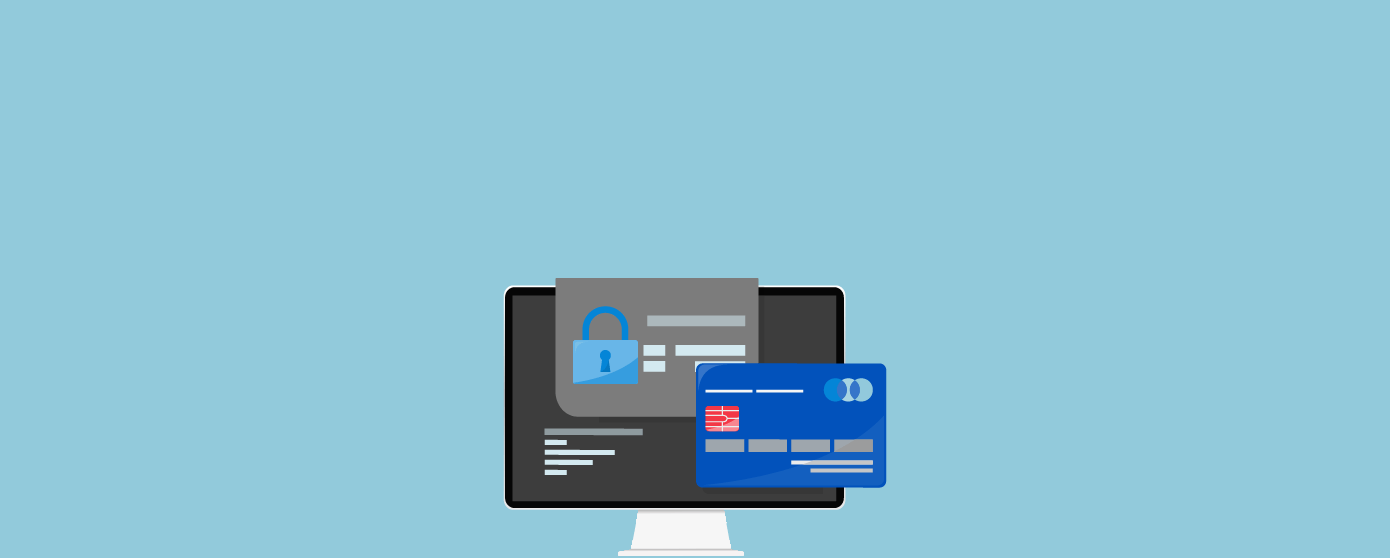

#### Objective
- The aim of this dataset is to build a model that can accurately detect credit card fraudulent transactions to prevent fraudulent activity. 

#### Machine learning models applied
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- XGBoost Classifier

#### Dataset source & brief
- The dataset has been sourced from Kaggle.
- It is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 to 31st Dec 2020. 
- It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

#### Project outline
- In this project, I will start with data processing and exploratory data analysis (EDA) to get a better understanding of the data. 
- I will also address the issue of imbalanced classes by using oversampling. - Finally, will evaluate the performance of the models and choose the best one based on various evaluation metrics.
- Next, will perform modeling, where I will use different Supervised machine learning algorithms to predict fraudulent transactions. 

#### Import required libraries

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Load & read the datasets

In [33]:
train=pd.read_csv(r"C:\Users\manme\Documents\Priya\Codsoft\2. Credit card fraud\fraudTrain.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [34]:
test=pd.read_csv(r"C:\Users\manme\Documents\Priya\Codsoft\2. Credit card fraud\fraudTest.csv")
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#### Basic info about the dataset

In [35]:
train.shape     # Check shape

(1296675, 23)

In [36]:
test.shape

(555719, 23)

- Both datasets have 23 columns. Train dataset has 1296675 rows & Test data has 555719 rows.

In [37]:
train.columns  #check column names

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [38]:
train.duplicated().sum()  #check duplicates

0

In [39]:
test.duplicated().sum()  #check duplicates

0

- No duplicates present

In [40]:
train.isnull().sum()   #check null values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [41]:
test.isnull().sum()   #check null values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

- No null values present in both datasets

#### Add new variable

In [42]:
train['data'] = 'train'
test['data'] = 'test'

#### Concatenate both datsets

In [43]:
df = pd.concat([train, test], axis=0)

In [44]:
df.shape

(1852394, 24)

In [45]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,data
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train


In [46]:
df.tail(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,data
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,test
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0,test


#### Drop non significant variables

In [47]:
df = df.drop(['Unnamed: 0','cc_num','merchant','first', 'last','street','trans_num','unix_time'], axis=1)

#### Converting trans_date_trans_time & dob into right format

In [49]:
datetime=pd.to_datetime(df['trans_date_trans_time'])
df['Trans_Day']=datetime.dt.day_name()
df['Trans_Month']=datetime.dt.month_name()
df['Trans_Year']=datetime.dt.year
df['Trans_hour']=datetime.dt.hour
datetime=pd.to_datetime(df['dob'])
df['Dob_Year']=datetime.dt.year
df.head(2)

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,city_pop,...,dob,merch_lat,merch_long,is_fraud,data,Trans_Day,Trans_Month,Trans_Year,Trans_hour,Dob_Year
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,...,1988-03-09,36.011293,-82.048315,0,train,Tuesday,January,2019,0,1988
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,...,1978-06-21,49.159047,-118.186462,0,train,Tuesday,January,2019,0,1978


#### Dropping trans_date_trans_time & dob as we have already segregated it

In [50]:
df.drop(['trans_date_trans_time','dob'],axis = 1, inplace = True)

In [51]:
df.info()    # Check info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   category     object 
 1   amt          float64
 2   gender       object 
 3   city         object 
 4   state        object 
 5   zip          int64  
 6   lat          float64
 7   long         float64
 8   city_pop     int64  
 9   job          object 
 10  merch_lat    float64
 11  merch_long   float64
 12  is_fraud     int64  
 13  data         object 
 14  Trans_Day    object 
 15  Trans_Month  object 
 16  Trans_Year   int64  
 17  Trans_hour   int64  
 18  Dob_Year     int64  
dtypes: float64(5), int64(6), object(8)
memory usage: 282.7+ MB


In [52]:
df.describe().T.style.background_gradient(cmap='Blues')   #Statistical Analysis on Numerical Columns

,count,mean,std,min,25%,50%,75%,max
amt,1852394.000000,70.063567,159.253975,1.000000,9.640000,47.450000,83.100000,28948.900000
zip,1852394.000000,48813.258191,26881.845966,1257.000000,26237.000000,48174.000000,72042.000000,99921.000000
lat,1852394.000000,38.539311,5.071470,20.027100,34.668900,39.354300,41.940400,66.693300
long,1852394.000000,-90.227832,13.747895,-165.672300,-96.798000,-87.476900,-80.158000,-67.950300
city_pop,1852394.000000,88643.674509,301487.618344,23.000000,741.000000,2443.000000,20328.000000,2906700.000000
merch_lat,1852394.000000,38.538976,5.105604,19.027422,34.740122,39.368900,41.956263,67.510267
merch_long,1852394.000000,-90.227940,13.759692,-166.671575,-96.899440,-87.440694,-80.245108,-66.950902
is_fraud,1852394.000000,0.005210,0.071992,0.000000,0.000000,0.000000,0.000000,1.000000
Trans_Year,1852394.000000,2019.500727,0.500000,2019.000000,2019.000000,2020.000000,2020.000000,2020.000000
Trans_hour,1852394.000000,12.806119,6.815753,0.000000,7.000000,14.000000,19.000000,23.000000


In [53]:
df.describe(include='object').T  # Analysis on Categorical Columns

,count,unique,top,freq
category,1852394,14,gas_transport,188029
gender,1852394,2,F,1014749
city,1852394,906,Birmingham,8040
state,1852394,51,TX,135269
job,1852394,497,Film/video editor,13898
data,1852394,2,train,1296675
Trans_Day,1852394,7,Monday,369418
Trans_Month,1852394,12,December,280598


#### Segregation of Numerical and Categorical Variables/Columns

In [54]:
categorical_col = df.select_dtypes(include = ['object']).columns
numerical_col = df.select_dtypes(exclude = ['object']).columns

### Exploratory Data Analysis

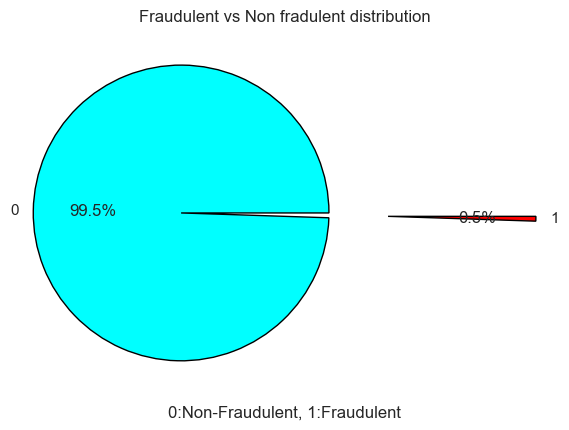

In [50]:
df['is_fraud'].value_counts().plot(kind='pie',explode=[0.7,0.7],autopct='%0.1f%%',
                                 colors=('aqua','red'),wedgeprops={'edgecolor': 'black'})
plt.title('Fraudulent vs Non fradulent distribution')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')
plt.show()

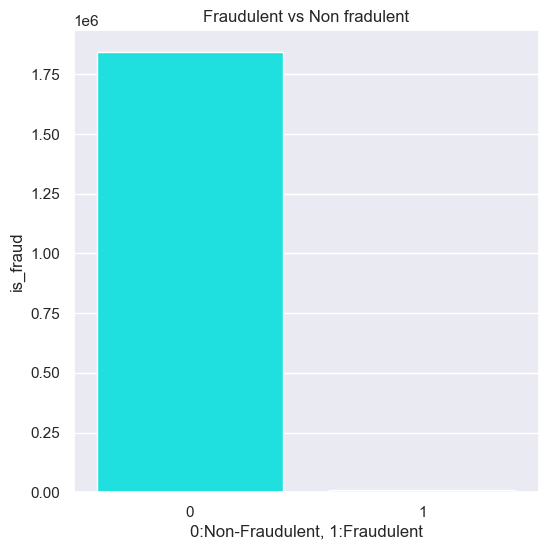

In [51]:
plt.figure(figsize=(6,6))
sns.barplot(x=df['is_fraud'].value_counts().index, y=df['is_fraud'].value_counts(), color='aqua')
plt.title('Fraudulent vs Non fradulent')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')
plt.show()

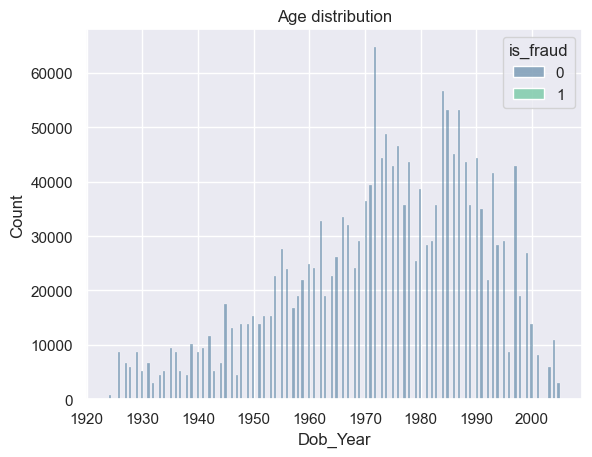

In [52]:
sns.histplot(x='Dob_Year',hue='is_fraud', data=df, palette='viridis')
plt.title('Age distribution')
plt.show()

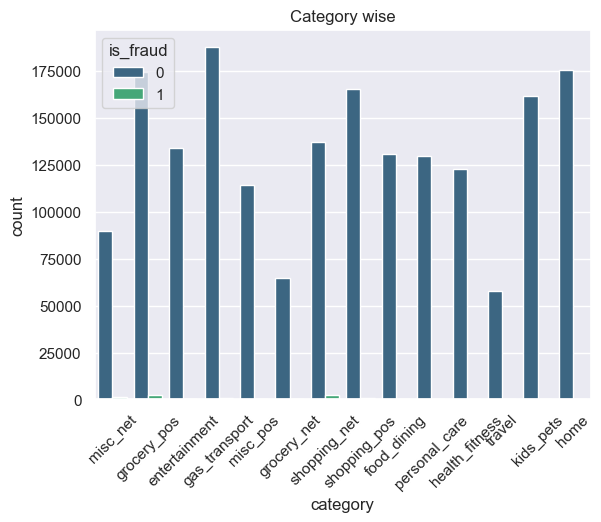

In [53]:
sns.countplot(x='category',hue='is_fraud', data=df, palette='viridis')
plt.title('Category wise')
plt.xticks(rotation=45)
plt.show()

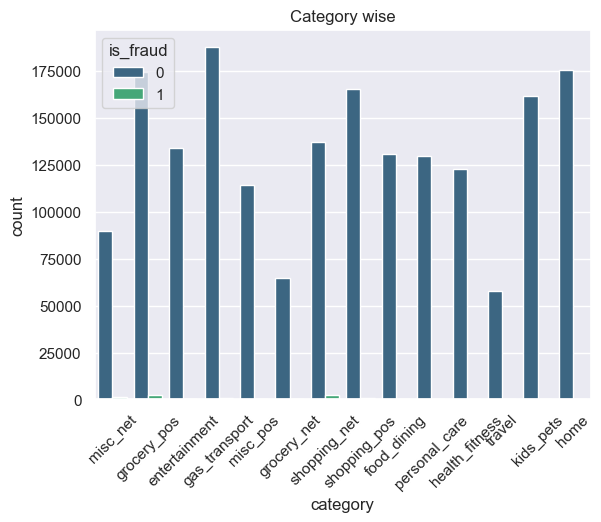

In [54]:
sns.countplot(x='category',hue='is_fraud', data=df, palette='viridis')
plt.title('Category wise')
plt.xticks(rotation=45)
plt.show()

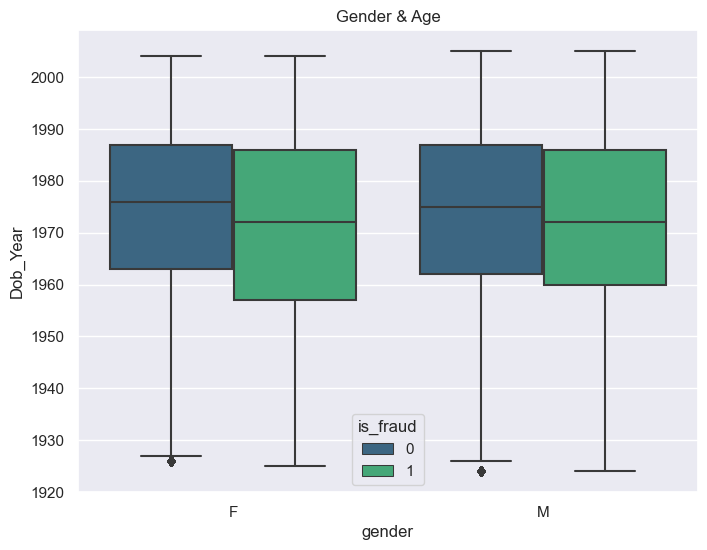

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(x='gender',y='Dob_Year',hue='is_fraud',data=df ,palette='viridis')
plt.title('Gender & Age')
plt.show()

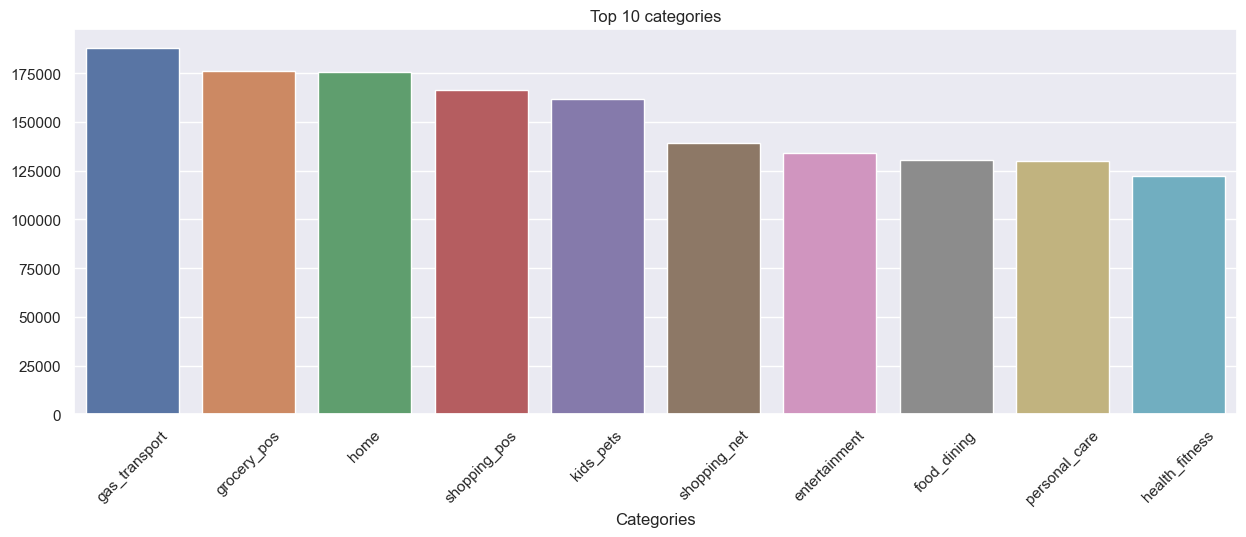

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.category.value_counts().head(10).index, y = df.category.value_counts().head(10).values)
plt.xlabel('Categories')
plt.title('Top 10 categories')
plt.xticks(rotation=45)
plt.show()

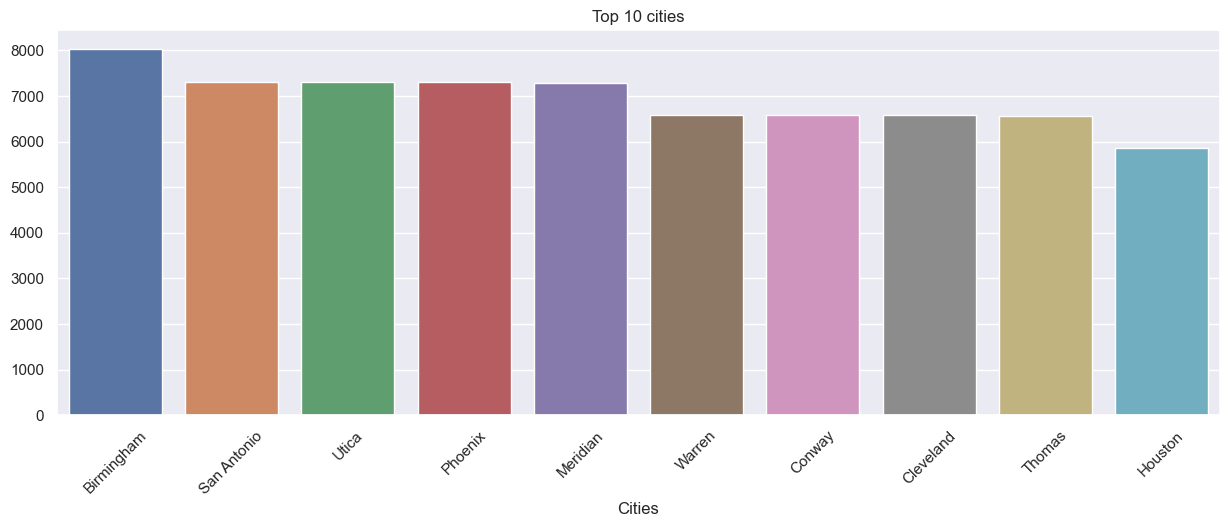

In [58]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.city.value_counts().head(10).index, y = df.city.value_counts().head(10).values)
plt.xlabel('Cities')
plt.title('Top 10 cities')
plt.xticks(rotation=45)
plt.show()

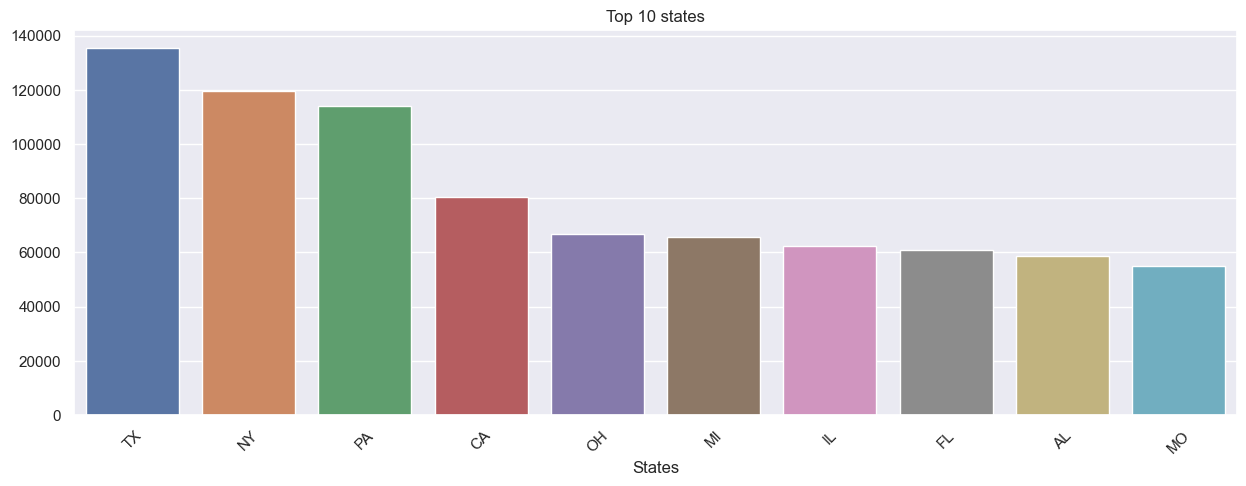

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.state.value_counts().head(10).index, y = df.state.value_counts().head(10).values)
plt.xlabel('States')
plt.title('Top 10 states')
plt.xticks(rotation=45)
plt.show()

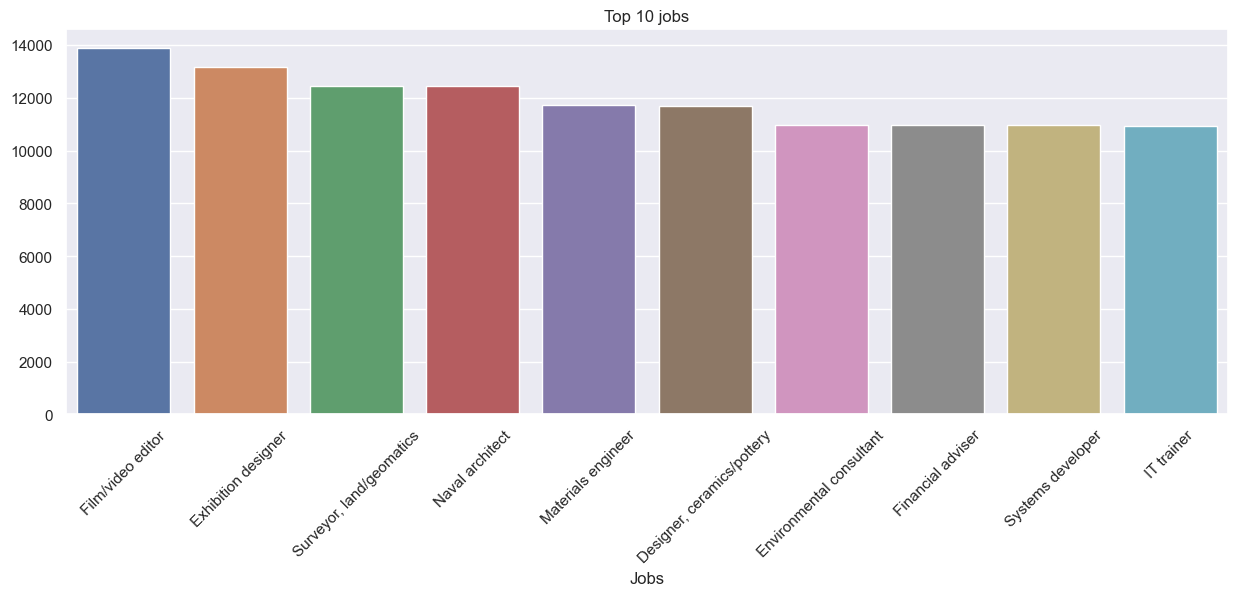

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.job.value_counts().head(10).index, y = df.job.value_counts().head(10).values)
plt.xlabel('Jobs')
plt.title('Top 10 jobs')
plt.xticks(rotation=45)
plt.show()

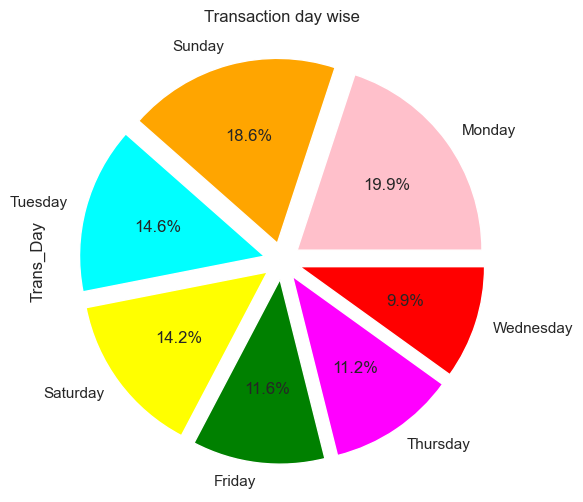

In [61]:
plt.figure(figsize=(6,6))
df['Trans_Day'].value_counts().plot(kind='pie',colors=('pink','orange','cyan','yellow','green','fuchsia','red'),
                                    explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%0.1f%%')
plt.title('Transaction day wise')
plt.show()

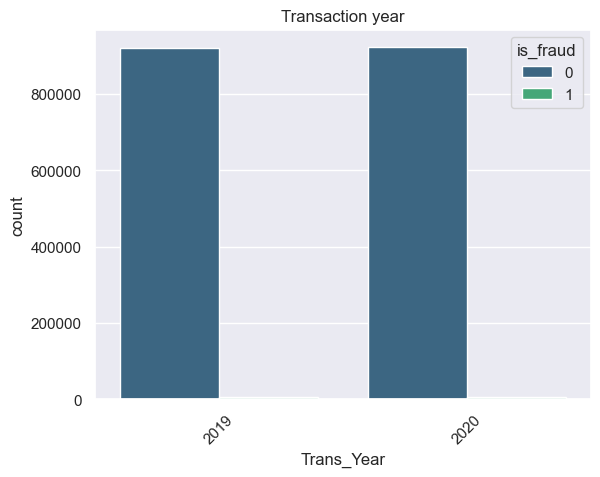

In [62]:
sns.countplot(x='Trans_Year',hue='is_fraud', data=df, palette='viridis')
plt.title('Transaction year')
plt.xticks(rotation=45)
plt.show()

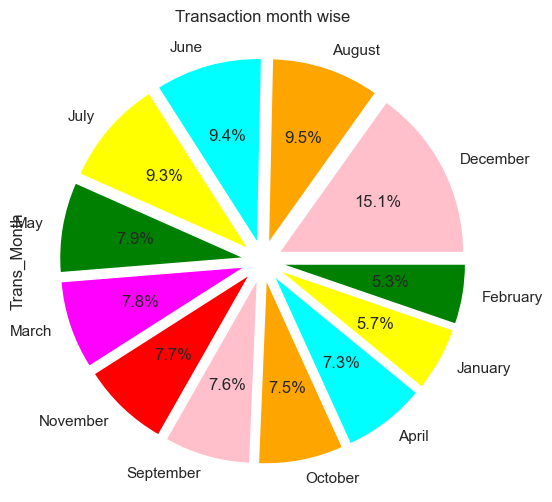

In [63]:
plt.figure(figsize=(8,6))
df['Trans_Month'].value_counts().plot(kind='pie',colors=('pink','orange','cyan','yellow','green','fuchsia','red'),
                                    explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%0.1f%%')
plt.title('Transaction month wise')
plt.show()

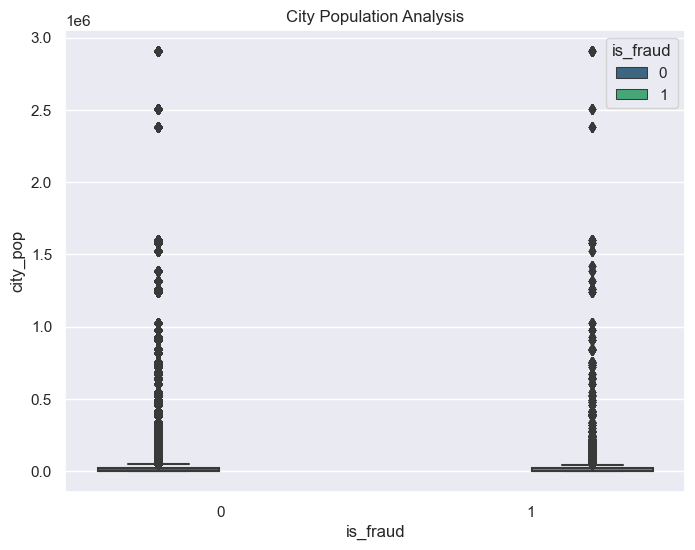

In [72]:
plt.figure(figsize=(8,6))
sns.boxplot(x='is_fraud',y='city_pop',hue='is_fraud',data=df ,palette='viridis')
plt.title('City Population Analysis')
plt.show()

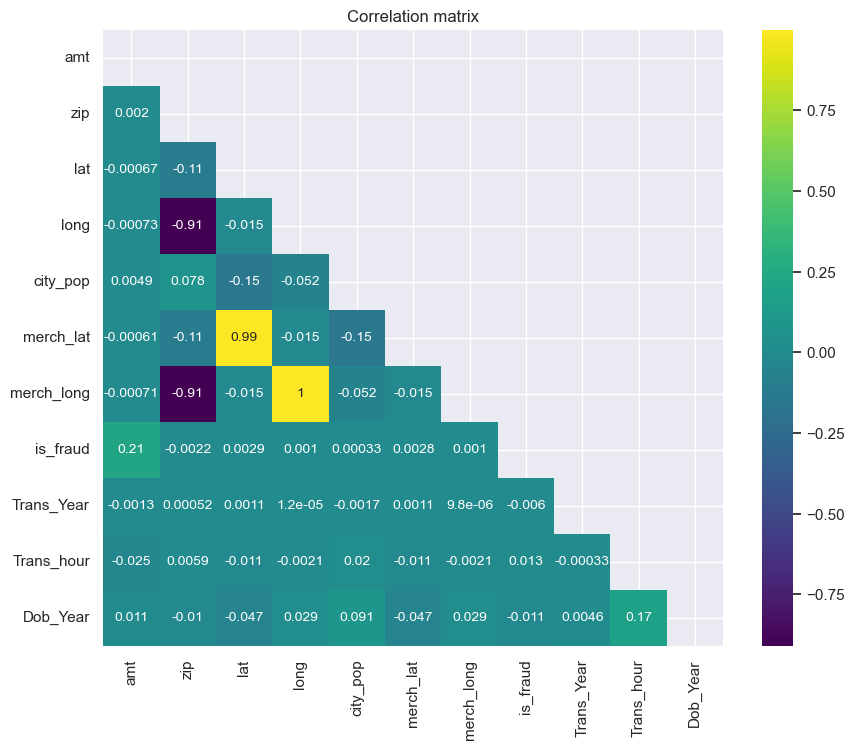

In [65]:
mask = np.zeros_like(df.corr(), dtype=float)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis', annot_kws={'size':10}, mask=mask)
plt.title('Correlation matrix')
plt.show()

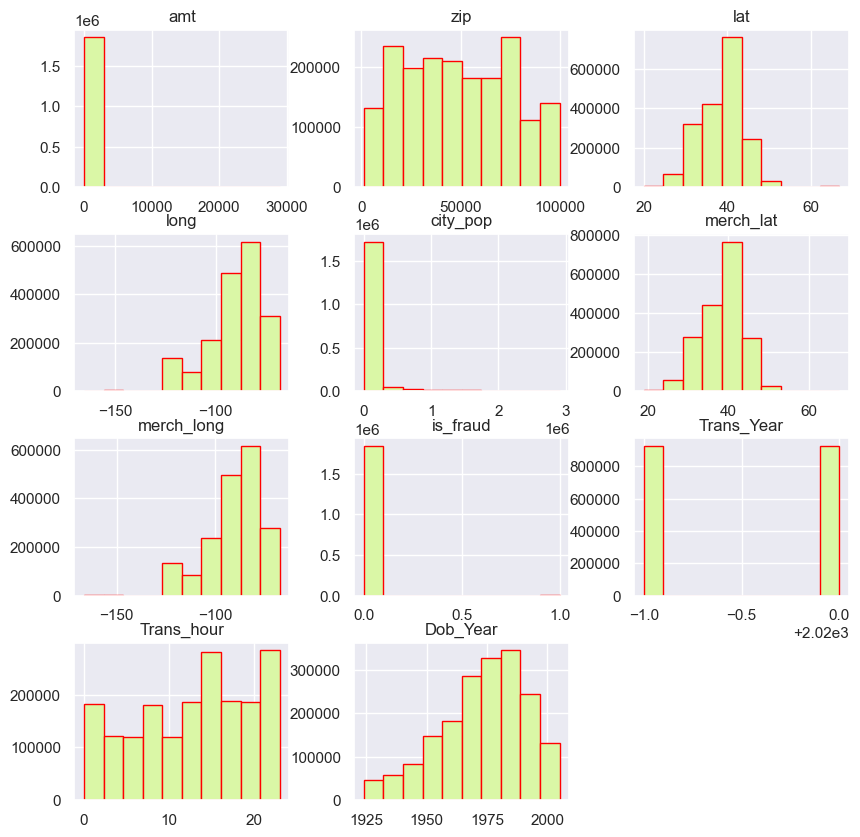

In [66]:
df.hist(bins=10, figsize=(10,10),color='#DAF7A6', edgecolor='red')
plt.title("Distribution of all variables")
plt.show()

#### Checking Outliers

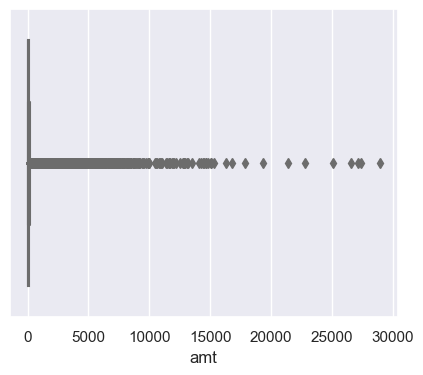

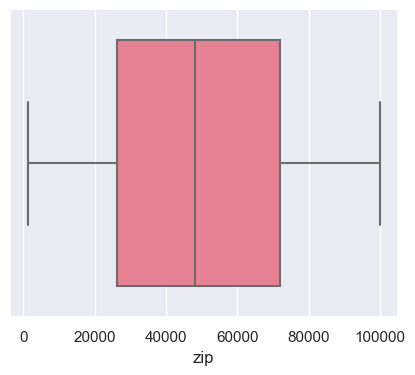

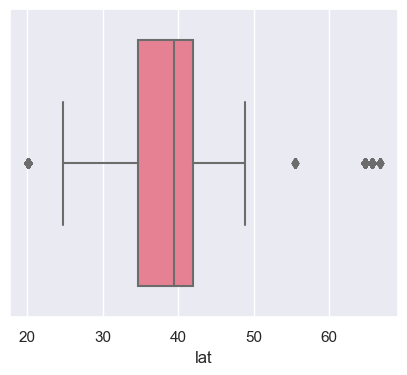

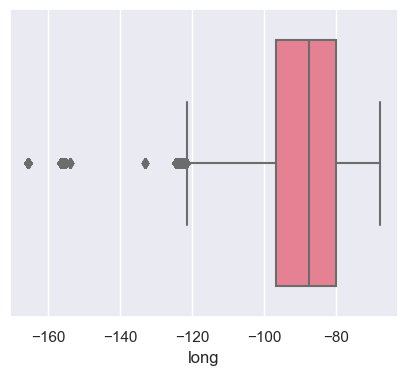

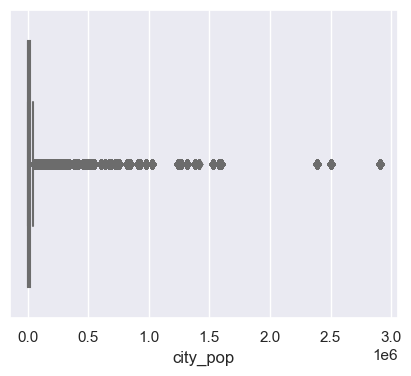

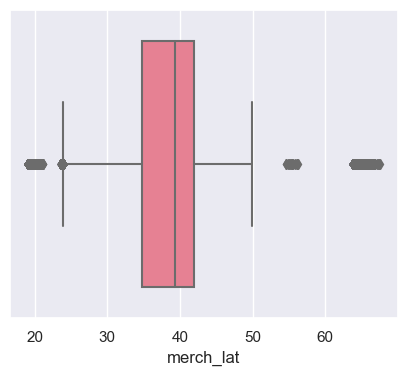

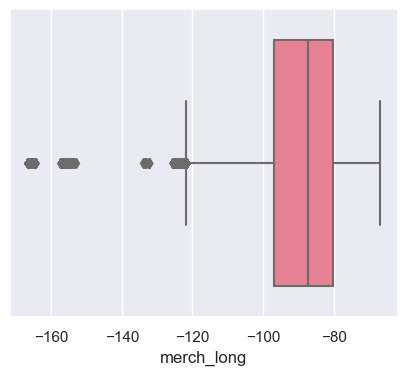

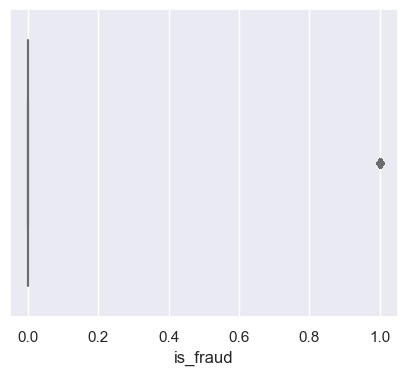

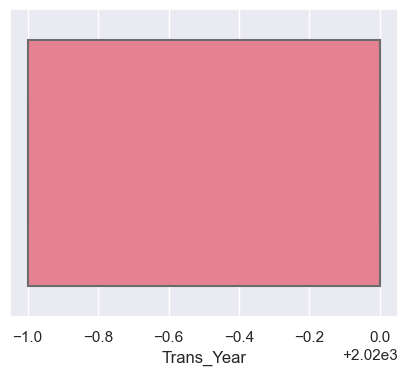

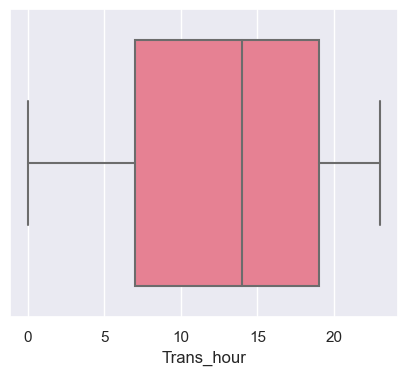

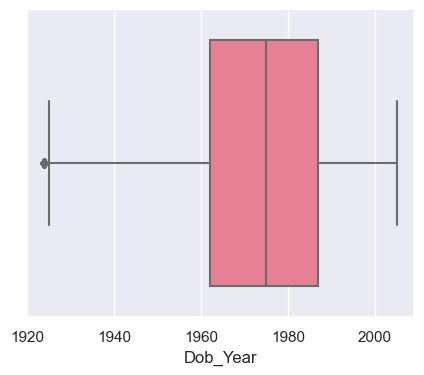

In [75]:
def boxplots(col):
    plt.figure(figsize=(5,4))    
    sns.boxplot(df,x=col,palette='husl')
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)   

In [55]:
df.drop(['gender', 'city', 'state','job','Trans_Day','Trans_Month'],axis=1, inplace=True)

In [56]:
df.columns

Index(['category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat',
       'merch_long', 'is_fraud', 'data', 'Trans_Year', 'Trans_hour',
       'Dob_Year'],
      dtype='object')

#### Encoding for category variable

In [59]:
df = pd.get_dummies(df,columns=['category'])

In [60]:
df.head(2)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,data,Trans_Year,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,train,2019,...,0,0,0,0,1,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,train,2019,...,1,0,0,0,0,0,0,0,0,0


In [61]:
df = df.drop(['category_gas_transport'], axis=1)  #drop dummy variable

In [62]:
df.head(2)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,data,Trans_Year,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,train,2019,...,0,0,0,0,1,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,train,2019,...,1,0,0,0,0,0,0,0,0,0


#### Splitting both datasets

In [63]:
train = df[df['data']=='train']
test = df[df['data']=='test']

In [64]:
print(train.shape, test.shape)

(1296675, 25) (555719, 25)


#### Split the train data into x and y

In [70]:
x=train.drop(['is_fraud','data'],axis=1)
y=train[['is_fraud']]

In [71]:
x.head(2)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,Trans_Year,Trans_hour,Dob_Year,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,2019,0,1988,...,0,0,0,0,1,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,2019,0,1978,...,1,0,0,0,0,0,0,0,0,0


In [72]:
y.head(2)

,is_fraud
0,0
1,0


In [73]:
test = test.drop(['data'], axis=1)

### Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
pd.DataFrame(x1).head(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.407826,-0.749136,-0.48442,0.65762,-0.282589,-0.494354,0.593864,-0.634065,-1.878145,0.848322,...,-0.324654,-0.266323,-0.323894,-0.309027,4.414613,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573
1,0.230039,1.872567,2.03912,-2.03387,-0.293670,2.078699,-2.030341,-0.634065,-1.878145,0.272898,...,3.080207,-0.266323,-0.323894,-0.309027,-0.226520,-0.255834,-0.274337,-0.28521,-0.314443,-0.179573


#### Check balance of data

In [118]:
y.value_counts()

Class
0        284315
1           492
dtype: int64

- Data is highly imbalanced

#### Handle imbalanced data

In [75]:
import imblearn   
from imblearn.over_sampling import RandomOverSampler   
ros=RandomOverSampler()
x_ovr,y_ovr=ros.fit_resample(x1,y)
print(x_ovr.shape,y_ovr.shape,y.shape)

(2578338, 23) (2578338, 1) (1296675, 1)


In [77]:
y_ovr.value_counts()

is_fraud
0           1289169
1           1289169
dtype: int64

#### Split data into train and test

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ovr,y_ovr,test_size=0.20,random_state=101)    

#### Model Building

#### Model No. 1 - Logistic Regression

In [79]:
# Model building
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=100)
log=logit.fit(x_train, y_train)
# Predict 
y_pred_train_log = logit.predict(x_train)
y_pred_test_log = logit.predict(x_test)
# Evaluate
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
accuracy_log_test=accuracy_score(y_test,y_pred_test_log)
accuracy_log_train=accuracy_score(y_train,y_pred_train_log)
print('Logistic regression Train accuracy:', accuracy_score(y_train, y_pred_train_log))
print('------'*10)
print('Logistic regression Test accuracy:', accuracy_score(y_test, y_pred_test_log))

Logistic regression Train accuracy: 0.8175718849840256
------------------------------------------------------------
Logistic regression Test accuracy: 0.816758069145264


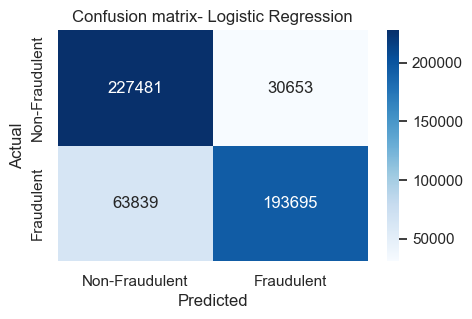

In [80]:
Labels = ['Non-Fraudulent', 'Fraudulent']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_log),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Model No 2- Decision Tree

In [101]:
# Model building
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)
#Predict
y_pred_train_dtree=dtree.predict(x_train)
y_pred_test_dtree=dtree.predict(x_test)
#Evaluate
accuracy_dtree_test=accuracy_score(y_test,y_pred_test_dtree)
accuracy_dtree_train=accuracy_score(y_train,y_pred_train_dtree)
print('Decision Tree - Train accuracy:', accuracy_score(y_train, y_pred_train_dtree))
print('-------'*10)
print('Decision Tree - Test accuracy:', accuracy_score(y_test, y_pred_test_dtree))

Decision Tree - Train accuracy: 1.0
----------------------------------------------------------------------
Decision Tree - Test accuracy: 0.9993755672254241


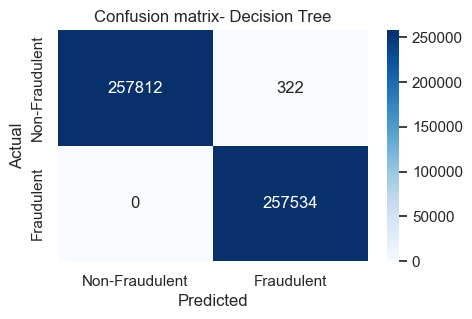

In [102]:
Labels = ['Non-Fraudulent', 'Fraudulent']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_dtree),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Decision Tree")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [103]:
# Using Post prunning method to handle overfitting probelm
def dtree_model(model):
    model_preds=model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(15,12),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)
plt.show()

In [104]:
# max depth at 5
prunned_dtree=DecisionTreeClassifier(max_depth=5)
prunned_dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    258134
           1       0.94      0.94      0.94    257534

    accuracy                           0.94    515668
   macro avg       0.94      0.94      0.94    515668
weighted avg       0.94      0.94      0.94    515668





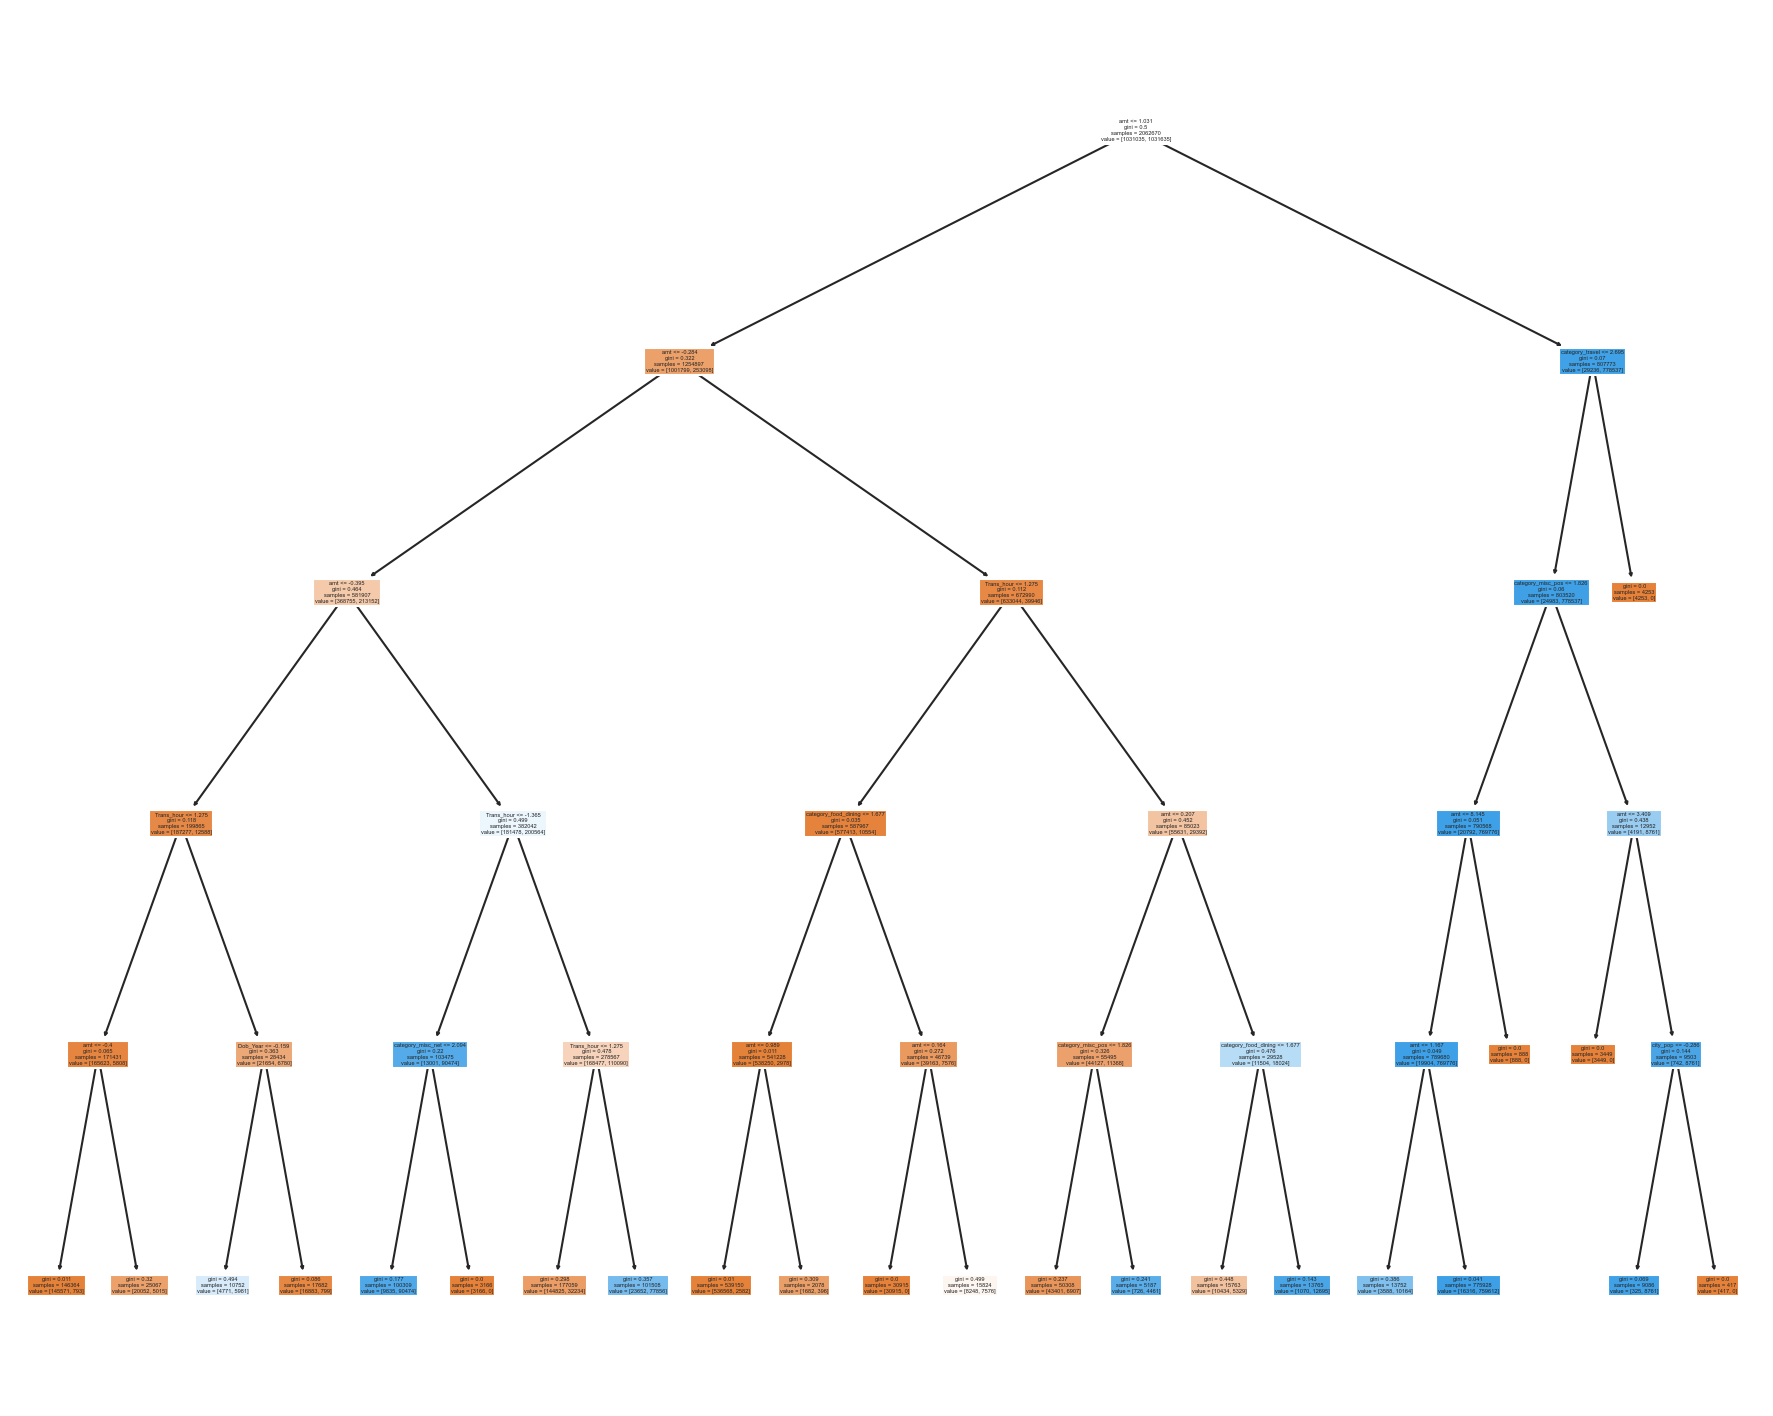

In [105]:
dtree_model(prunned_dtree)

In [106]:
# Predict
y_pred_prunned_train=prunned_dtree.predict(x_train)
y_pred_prunned_test=prunned_dtree.predict(x_test)
# Evaluate
accuracy_prunneddtree_test=accuracy_score(y_test,y_pred_prunned_test)
accuracy_prunneddtree_train=accuracy_score(y_train,y_pred_prunned_train)
print('Decision Tree post prunning- Train accuracy:',accuracy_score(y_train,y_pred_prunned_train))
print('-------'*10)
print('Decision Tree post prunning- Test accuracy:', accuracy_score(y_test,y_pred_prunned_test))

Decision Tree post prunning- Train accuracy: 0.9408950534986207
----------------------------------------------------------------------
Decision Tree post prunning- Test accuracy: 0.940739002614085


#### Model No - 3 - Random Forest

In [87]:
# Model building
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,oob_score=False)
rf.fit(x_train,y_train)
# Predict
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)
# Evaluate
accuracy_rf_test=accuracy_score(y_test,y_pred_test_rf)
accuracy_rf_train=accuracy_score(y_train,y_pred_train_rf)
print('Random Forest - Train accuracy:', accuracy_score(y_train, y_pred_train_rf))
print('-------'*10)
print('Random Forest - Test accuracy:', accuracy_score(y_test, y_pred_test_rf))

Random Forest - Train accuracy: 1.0
----------------------------------------------------------------------
Random Forest - Test accuracy: 0.9997769882947943


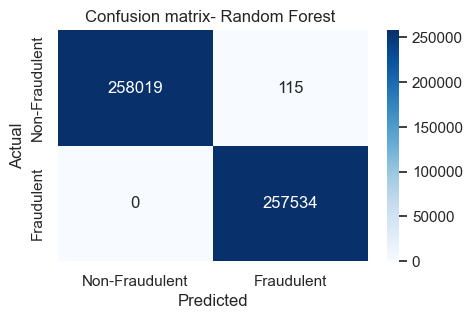

In [88]:
Labels = ['Non-Fraudulent', 'Fraudulent']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_rf),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Random Forest ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Model no 4- XGBoost

In [89]:
# Model building
from xgboost import XGBClassifier
xgb = XGBClassifier()
xg=xgb.fit(x_train, y_train)
# Predict 
y_pred_xg = xgb.predict(x_test)
y_pred_xg_train = xgb.predict(x_train)
# Evaluate
accuracy_xg_test=accuracy_score(y_test,y_pred_xg)
accuracy_xg_train=accuracy_score(y_train,y_pred_xg_train)
print('XGBoost Train accuracy:', accuracy_score(y_train, y_pred_xg_train))
print('-------'*5)
print('XGBoost Test accuracy:', accuracy_score(y_test, y_pred_xg))

XGBoost Train accuracy: 0.9962839426568477
-----------------------------------
XGBoost Test accuracy: 0.9960226347184623


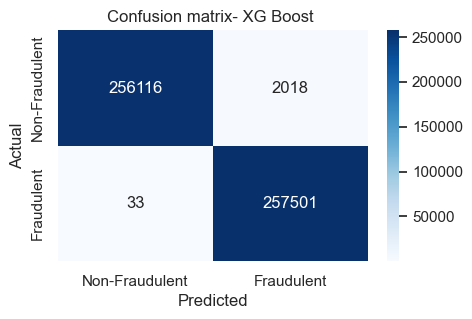

In [90]:
Labels = ['Non-Fraudulent', 'Fraudulent']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_xg),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- XG Boost ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Combining all models in Tabular format for better understanding¶

In [107]:
Models=['Logistic','Decision_tree','Random_forest','XGboost']
Trainacc=[accuracy_log_train,accuracy_prunneddtree_train,accuracy_rf_train,accuracy_xg_train]
Testacc=[accuracy_log_test,accuracy_prunneddtree_test,accuracy_rf_test,accuracy_xg_test]

In [108]:
Combined_accuracy=pd.DataFrame({'Model name':Models,'Train Accuracy':Trainacc,
                                'Test Accuracy':Testacc})
print(Combined_accuracy)

      Model name  Train Accuracy  Test Accuracy
0       Logistic        0.817572       0.816758
1  Decision_tree        0.940895       0.940739
2  Random_forest        1.000000       0.999777
3        XGboost        0.996284       0.996023


#### Accuracy visualization

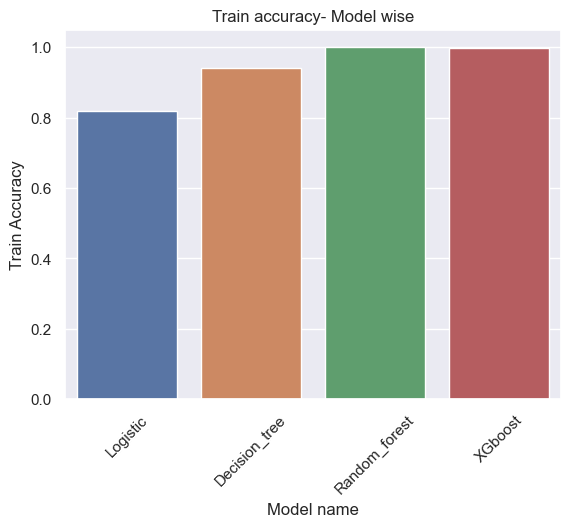

In [109]:
sns.barplot(x='Model name',y='Train Accuracy',data=Combined_accuracy)
plt.xticks(rotation=45)
plt.title('Train accuracy- Model wise')
plt.show()

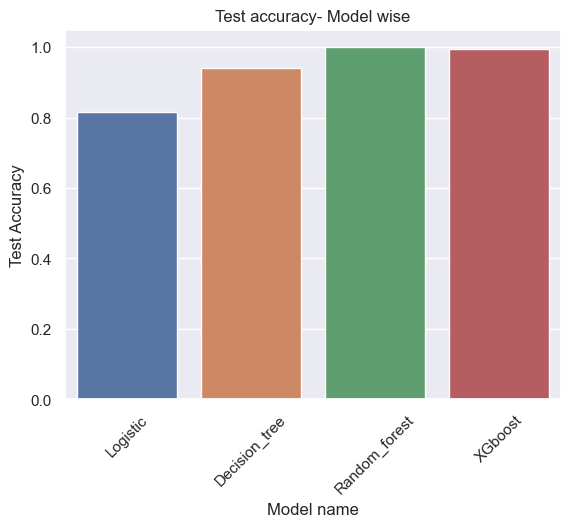

In [110]:
sns.barplot(x='Model name',y='Test Accuracy',data=Combined_accuracy)
plt.xticks(rotation=45)
plt.title('Test accuracy- Model wise')
plt.show()

#### Conclusion
- In this project I tried to 4 supervised machine learning algorithm to detect fraudulent credit card transactions.
- Both train and test data accuracy for all 4 models are coming way above the commonly taken threshold value of 70%.
- There is less than 10% accuracy variation in both datasets.
- The main problem when dealing was the highly imbalanced dataset in which the majority of the transaction are non-fraud ones so used oversampling method to handle it.
- Random forest gives the highest accuracy among all 4 models, followed closely by XGboost.
- Logistic regression model yielded the lowest accuracy of 81% for both Train & Test data. 